In [53]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.interpolate import CubicSpline


[0.20525431 0.17321701 0.15136352 0.1350102  0.12196607 0.11116648
 0.10202242]


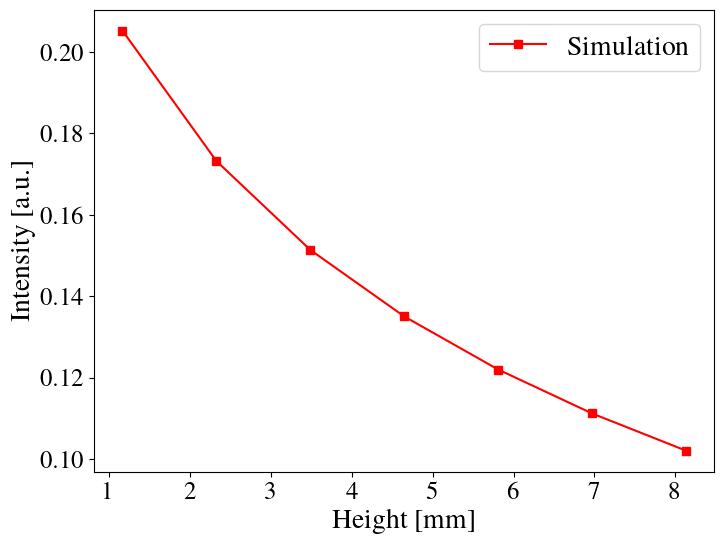

x: 1.16212942579522, y: 0.20525430539495398, dy/dx: -0.029622695998273035
x: 2.32425885159045, y: 0.1732170059760129, dy/dx: -0.023457873339890235
x: 3.48638827738567, y: 0.15136352220050991, dy/dx: -0.01566314645242005
x: 4.6485177031809, y: 0.135010198606293, dy/dx: -0.012519193938102606
x: 5.81064712897612, y: 0.12196606507898916, dy/dx: -0.01014867454437728
x: 6.97277655477135, y: 0.11116648173843637, dy/dx: -0.008437901527873787
x: 8.13490598056657, y: 0.1020224210048046, dy/dx: -0.0075835996198656865

Curve Type: Cubic Spline
Parameters: a_0: 0.0015, -0.0011, -0.0000, -0.0002, -0.0000, -0.0002, a_1: 0.0000, 0.0053, 0.0014, 0.0013, 0.0007, 0.0007, a_2: -0.0296, -0.0235, -0.0157, -0.0125, -0.0101, -0.0084, a_3: 0.2053, 0.1732, 0.1514, 0.1350, 0.1220, 0.1112


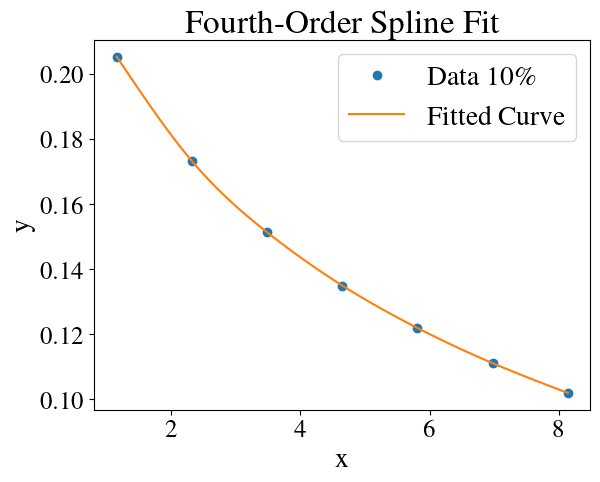

In [54]:
%matplotlib inline

# Autor: Enzo Gaggioli, e.l.gaggioli@gmail.com.
# IFIBA-CONICET-UBA

directory = '/home/enzo/Desktop/Enzo/errs/'


with open( directory + "/intensidad_ems_Ls_10.dat", "r") as f:
    lines = f.readlines()

# Create an empty list to store the data
t_intensity_L_10 = []

# Iterate over the lines in reverse order and extract the second value
for line in reversed(lines):
    value = float(line.split()[1])
    t_intensity_L_10.append(value)

# Print the final vector
#print(t_intensity_iso)
t_intensity_L_10 = np.array(t_intensity_L_10, dtype=float)

sum_t = sum(t_intensity_L_10)
t_intensity_L_10 = t_intensity_L_10/sum_t
print(t_intensity_L_10)


plt.figure(figsize=(8.00, 6.00))  # Set figure size in pixels

# Set LaTeX font
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times'

# Set font size
mpl.rcParams['font.size'] = 20

# Set axis tick font size
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18

# Data
#c = [1.16212942579522, 2.32425885159045, 3.48638827738567, 4.6485177031809, 5.81064712897612, 6.97277655477135, 8.13490598056657, 9.2970354063618, 10.459164832157, 11.6212942579522]

c = [1.16212942579522, 2.32425885159045, 3.48638827738567, 4.6485177031809, 5.81064712897612, 6.97277655477135, 8.13490598056657]

# Plotting
plt.plot(c, t_intensity_L_10, 's-', label=r'Simulation', color='red')

# Axis labels and legend

plt.xlabel(r'{Height [mm]}')
plt.ylabel(r'Intensity [a.u.]')

plt.legend()

# Save and show figure
plt.show()


# Given data
x_data = np.array([1.16212942579522, 2.32425885159045, 3.48638827738567, 4.6485177031809, 5.81064712897612, 6.97277655477135, 8.13490598056657])
y_data = t_intensity_L_10

# Sort the data in increasing order of x
sort_indices = np.argsort(x_data)
x_data = x_data[sort_indices]
y_data = y_data[sort_indices]

# Create a cubic spline object
spline = CubicSpline(x_data, y_data, bc_type='natural')

# Calculate the derivatives at each data point
derivatives = spline.derivative()

# Generate x-values for the fitted curve
x_fit = np.linspace(x_data[0], x_data[-1], 100)

# Evaluate the spline at the fitted curve points
y_fit = spline(x_fit)

# Print the results
for x, y, dy in zip(x_data, y_data, derivatives(x_data)):
    print(f"x: {x}, y: {y}, dy/dx: {dy}")

# Get the equation of the cubic spline
coefs = spline.c.tolist()

# Print the curve type and parameters
curve_type = "Cubic Spline"
params = [f"a_{i}: " + ', '.join([f"{float(c):.4f}" for c in coef]) for i, coef in enumerate(coefs)]
params_str = ", ".join(params)
print(f"\nCurve Type: {curve_type}")
print(f"Parameters: {params_str}")

# Print the fitted curve data
#print("\nFitted Curve Data:")
#for x, y in zip(x_fit, y_fit):
#    print(f"x: {x}, y: {y}")

# Plot the data and fitted curve
plt.plot(x_data, y_data, 'o', label='Data 10\%')
plt.plot(x_fit, y_fit, label='Fitted Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fourth-Order Spline Fit')
plt.legend()

# Display the plot
plt.show()

[0.23321623 0.18323273 0.15203823 0.12976259 0.11292233 0.09972765
 0.08910024]


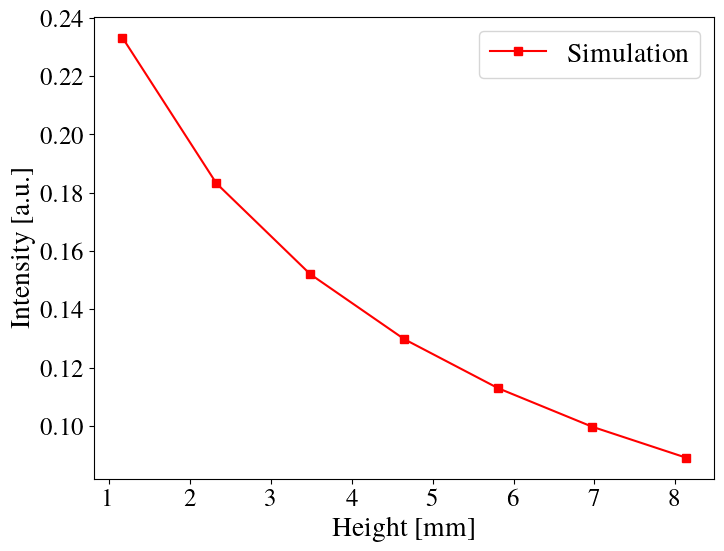

x: 1.16212942579522, y: 0.23321623427128896, dy/dx: -0.04686809159713188
x: 2.32425885159045, y: 0.1832327303081022, dy/dx: -0.03529463605975444
x: 3.48638827738567, y: 0.1520382312136853, dy/dx: -0.021511786631437855
x: 4.6485177031809, y: 0.12976258831245904, dy/dx: -0.01668968140325211
x: 5.81064712897612, y: 0.11292233112755837, dy/dx: -0.012705934658687289
x: 6.97277655477135, y: 0.09972764660759777, dy/dx: -0.010020822804982184
x: 8.13490598056657, y: 0.08910023815930845, dy/dx: -0.008706746358595474

Curve Type: Cubic Spline
Parameters: a_0: 0.0029, -0.0023, 0.0001, -0.0003, -0.0000, -0.0003, a_1: -0.0000, 0.0100, 0.0019, 0.0022, 0.0012, 0.0011, a_2: -0.0469, -0.0353, -0.0215, -0.0167, -0.0127, -0.0100, a_3: 0.2332, 0.1832, 0.1520, 0.1298, 0.1129, 0.0997


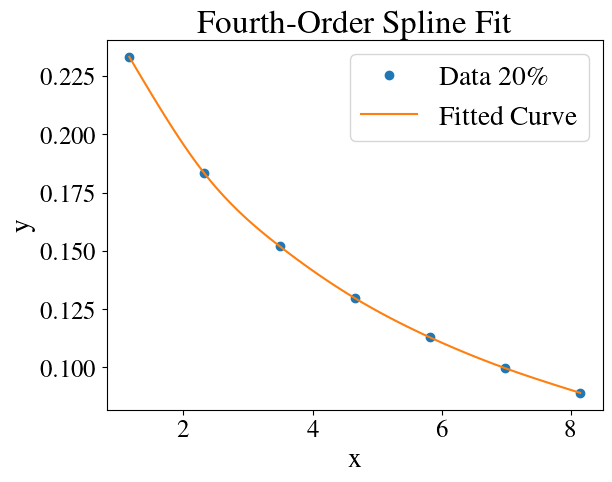

In [55]:
with open( directory + "/intensidad_ems_Ls_20.dat", "r") as f:
    lines = f.readlines()

# Create an empty list to store the data
t_intensity_L_20 = []

# Iterate over the lines in reverse order and extract the second value
for line in reversed(lines):
    value = float(line.split()[1])
    t_intensity_L_20.append(value)

# Print the final vector
#print(t_intensity_iso)
t_intensity_L_20 = np.array(t_intensity_L_20, dtype=float)

sum_t = sum(t_intensity_L_20)
t_intensity_L_20 = t_intensity_L_20/sum_t
print(t_intensity_L_20)


plt.figure(figsize=(8.00, 6.00))  # Set figure size in pixels

# Set LaTeX font
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times'

# Set font size
mpl.rcParams['font.size'] = 20

# Set axis tick font size
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18



# Plotting
plt.plot(c, t_intensity_L_20, 's-', label=r'Simulation', color='red')

# Axis labels and legend

plt.xlabel(r'{Height [mm]}')
plt.ylabel(r'Intensity [a.u.]')

plt.legend()

# Save and show figure
plt.show()


# Given data
x_data = np.array([1.16212942579522, 2.32425885159045, 3.48638827738567, 4.6485177031809, 5.81064712897612, 6.97277655477135, 8.13490598056657])
y_data = t_intensity_L_20

# Sort the data in increasing order of x
sort_indices = np.argsort(x_data)
x_data = x_data[sort_indices]
y_data = y_data[sort_indices]

# Create a cubic spline object
spline = CubicSpline(x_data, y_data, bc_type='natural')

# Calculate the derivatives at each data point
derivatives = spline.derivative()

# Generate x-values for the fitted curve
x_fit = np.linspace(x_data[0], x_data[-1], 100)

# Evaluate the spline at the fitted curve points
y_fit = spline(x_fit)

# Print the results
for x, y, dy in zip(x_data, y_data, derivatives(x_data)):
    print(f"x: {x}, y: {y}, dy/dx: {dy}")

# Get the equation of the cubic spline
coefs = spline.c.tolist()

# Print the curve type and parameters
curve_type = "Cubic Spline"
params = [f"a_{i}: " + ', '.join([f"{float(c):.4f}" for c in coef]) for i, coef in enumerate(coefs)]
params_str = ", ".join(params)
print(f"\nCurve Type: {curve_type}")
print(f"Parameters: {params_str}")

# Print the fitted curve data
#print("\nFitted Curve Data:")
#for x, y in zip(x_fit, y_fit):
#    print(f"x: {x}, y: {y}")

# Plot the data and fitted curve
plt.plot(x_data, y_data, 'o', label='Data 20\%')
plt.plot(x_fit, y_fit, label='Fitted Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fourth-Order Spline Fit')
plt.legend()

# Display the plot
plt.show()

[0.26958171 0.19301583 0.14976184 0.12178607 0.10214642 0.08753179
 0.07617634]


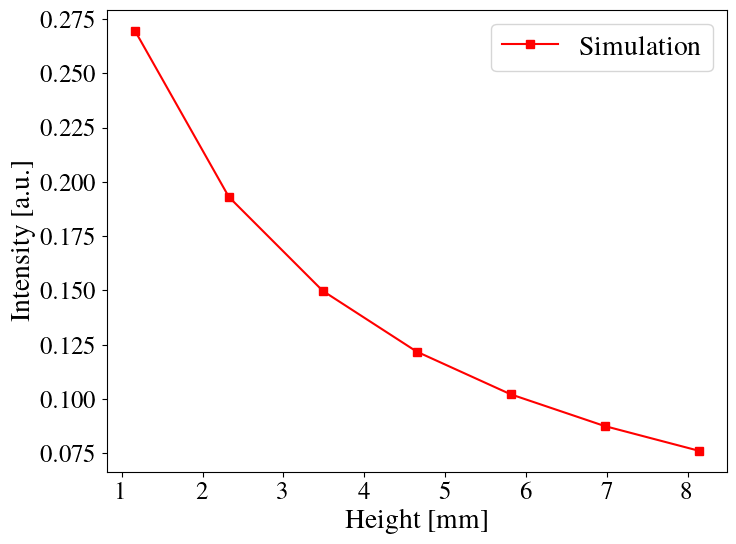

x: 1.16212942579522, y: 0.26958170630919054, dy/dx: -0.07274024587624826
x: 2.32425885159045, y: 0.1930158264931596, dy/dx: -0.052171881855472044
x: 3.48638827738567, y: 0.1497618391099139, dy/dx: -0.027883387420350052
x: 4.6485177031809, y: 0.12178606988535463, dy/dx: -0.020171910418556867
x: 5.81064712897612, y: 0.10214642477074617, dy/dx: -0.01434664242015569
x: 6.97277655477135, y: 0.08753179458552651, dy/dx: -0.01086783767447596
x: 8.13490598056657, y: 0.07617633884610871, dy/dx: -0.009222954339750265

Curve Type: Cubic Spline
Parameters: a_0: 0.0051, -0.0042, 0.0001, -0.0005, -0.0000, -0.0004, a_1: 0.0000, 0.0177, 0.0032, 0.0034, 0.0016, 0.0014, a_2: -0.0727, -0.0522, -0.0279, -0.0202, -0.0143, -0.0109, a_3: 0.2696, 0.1930, 0.1498, 0.1218, 0.1021, 0.0875


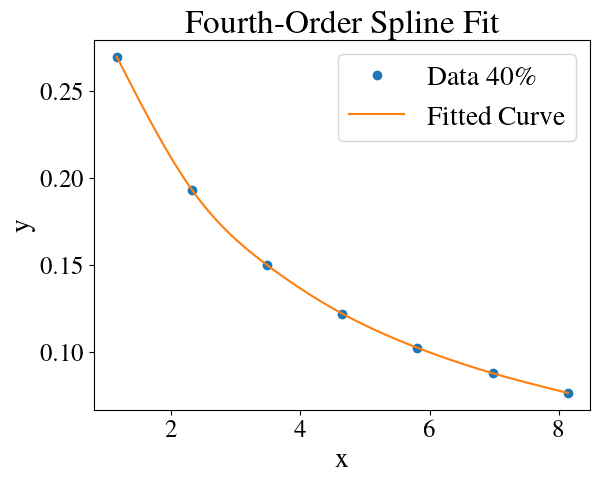

In [56]:
with open( directory + "/intensidad_ems_Ls_40.dat", "r") as f:
    lines = f.readlines()

# Create an empty list to store the data
t_intensity_L_40 = []

# Iterate over the lines in reverse order and extract the second value
for line in reversed(lines):
    value = float(line.split()[1])
    t_intensity_L_40.append(value)

# Print the final vector
#print(t_intensity_iso)
t_intensity_L_40 = np.array(t_intensity_L_40, dtype=float)

sum_t = sum(t_intensity_L_40)
t_intensity_L_40 = t_intensity_L_40/sum_t
print(t_intensity_L_40)


plt.figure(figsize=(8.00, 6.00))  # Set figure size in pixels

# Set LaTeX font
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times'

# Set font size
mpl.rcParams['font.size'] = 20

# Set axis tick font size
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18



# Plotting
plt.plot(c, t_intensity_L_40, 's-', label=r'Simulation', color='red')

# Axis labels and legend

plt.xlabel(r'{Height [mm]}')
plt.ylabel(r'Intensity [a.u.]')

plt.legend()

# Save and show figure
plt.show()

# Given data
x_data = np.array([1.16212942579522, 2.32425885159045, 3.48638827738567, 4.6485177031809, 5.81064712897612, 6.97277655477135, 8.13490598056657])
y_data = t_intensity_L_40

# Sort the data in increasing order of x
sort_indices = np.argsort(x_data)
x_data = x_data[sort_indices]
y_data = y_data[sort_indices]

# Create a cubic spline object
spline = CubicSpline(x_data, y_data, bc_type='natural')

# Calculate the derivatives at each data point
derivatives = spline.derivative()

# Generate x-values for the fitted curve
x_fit = np.linspace(x_data[0], x_data[-1], 100)

# Evaluate the spline at the fitted curve points
y_fit = spline(x_fit)

# Print the results
for x, y, dy in zip(x_data, y_data, derivatives(x_data)):
    print(f"x: {x}, y: {y}, dy/dx: {dy}")

# Get the equation of the cubic spline
coefs = spline.c.tolist()

# Print the curve type and parameters
curve_type = "Cubic Spline"
params = [f"a_{i}: " + ', '.join([f"{float(c):.4f}" for c in coef]) for i, coef in enumerate(coefs)]
params_str = ", ".join(params)
print(f"\nCurve Type: {curve_type}")
print(f"Parameters: {params_str}")

# Print the fitted curve data
#print("\nFitted Curve Data:")
#for x, y in zip(x_fit, y_fit):
#    print(f"x: {x}, y: {y}")

# Plot the data and fitted curve
plt.plot(x_data, y_data, 'o', label='Data 40\%')
plt.plot(x_fit, y_fit, label='Fitted Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fourth-Order Spline Fit')
plt.legend()

# Display the plot
plt.show()

[0.2920856  0.19693793 0.14750357 0.11705493 0.09623753 0.08097112
 0.06920933]


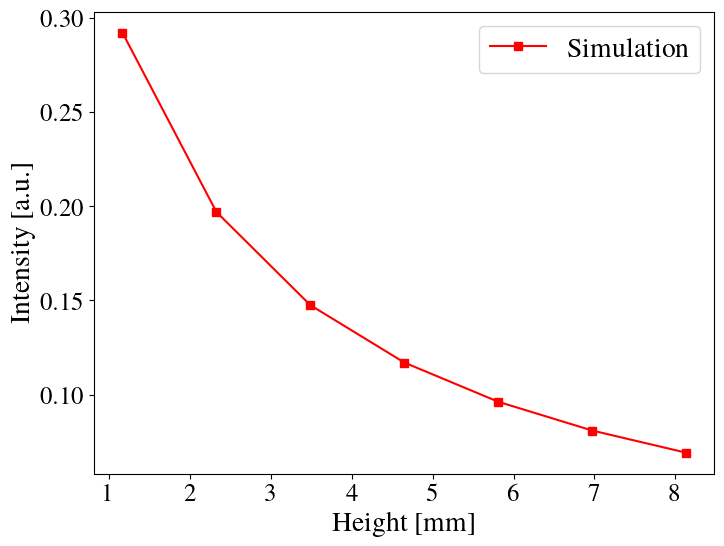

x: 1.16212942579522, y: 0.2920855952601778, dy/dx: -0.0913793693305937
x: 2.32425885159045, y: 0.19693792803507137, dy/dx: -0.0628619257325348
x: 3.48638827738567, y: 0.14750356749524268, dy/dx: -0.030406815176545945
x: 4.6485177031809, y: 0.11705493150337554, dy/dx: -0.021726218038368918
x: 5.81064712897612, y: 0.09623752944528911, dy/dx: -0.015029952711163258
x: 6.97277655477135, y: 0.08097111811730809, dy/dx: -0.011303183033824445
x: 8.13490598056657, y: 0.0692093301435353, dy/dx: -0.009529748503444537

Curve Type: Cubic Spline
Parameters: a_0: 0.0070, -0.0061, 0.0002, -0.0007, -0.0000, -0.0004, a_1: 0.0000, 0.0245, 0.0034, 0.0041, 0.0017, 0.0015, a_2: -0.0914, -0.0629, -0.0304, -0.0217, -0.0150, -0.0113, a_3: 0.2921, 0.1969, 0.1475, 0.1171, 0.0962, 0.0810


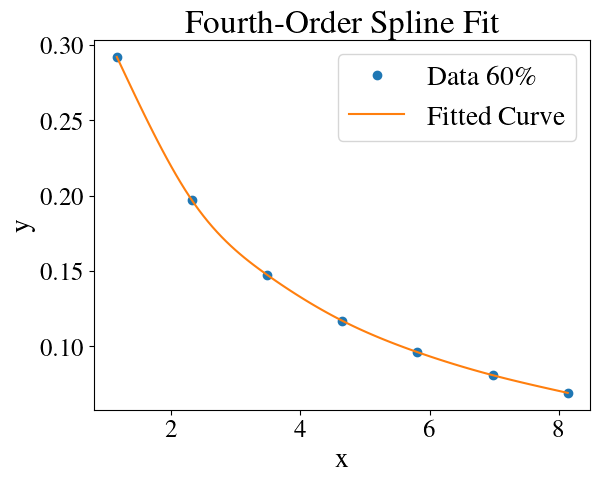

In [57]:
with open( directory + "/intensidad_ems_Ls_60.dat", "r") as f:
    lines = f.readlines()

# Create an empty list to store the data
t_intensity_L_60 = []

# Iterate over the lines in reverse order and extract the second value
for line in reversed(lines):
    value = float(line.split()[1])
    t_intensity_L_60.append(value)

# Print the final vector
#print(t_intensity_iso)
t_intensity_L_60 = np.array(t_intensity_L_60, dtype=float)

sum_t = sum(t_intensity_L_60)
t_intensity_L_60 = t_intensity_L_60/sum_t
print(t_intensity_L_60)


plt.figure(figsize=(8.00, 6.00))  # Set figure size in pixels

# Set LaTeX font
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times'

# Set font size
mpl.rcParams['font.size'] = 20

# Set axis tick font size
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18


# Plotting
plt.plot(c, t_intensity_L_60, 's-', label=r'Simulation', color='red')

# Axis labels and legend

plt.xlabel(r'{Height [mm]}')
plt.ylabel(r'Intensity [a.u.]')

plt.legend()

# Save and show figure
plt.show()

# Given data
x_data = np.array([1.16212942579522, 2.32425885159045, 3.48638827738567, 4.6485177031809, 5.81064712897612, 6.97277655477135, 8.13490598056657])
y_data = t_intensity_L_60

# Sort the data in increasing order of x
sort_indices = np.argsort(x_data)
x_data = x_data[sort_indices]
y_data = y_data[sort_indices]

# Create a cubic spline object
spline = CubicSpline(x_data, y_data, bc_type='natural')

# Calculate the derivatives at each data point
derivatives = spline.derivative()

# Generate x-values for the fitted curve
x_fit = np.linspace(x_data[0], x_data[-1], 100)

# Evaluate the spline at the fitted curve points
y_fit = spline(x_fit)

# Print the results
for x, y, dy in zip(x_data, y_data, derivatives(x_data)):
    print(f"x: {x}, y: {y}, dy/dx: {dy}")

# Get the equation of the cubic spline
coefs = spline.c.tolist()

# Print the curve type and parameters
curve_type = "Cubic Spline"
params = [f"a_{i}: " + ', '.join([f"{float(c):.4f}" for c in coef]) for i, coef in enumerate(coefs)]
params_str = ", ".join(params)
print(f"\nCurve Type: {curve_type}")
print(f"Parameters: {params_str}")

# Print the fitted curve data
#print("\nFitted Curve Data:")
#for x, y in zip(x_fit, y_fit):
#    print(f"x: {x}, y: {y}")

# Plot the data and fitted curve
plt.plot(x_data, y_data, 'o', label='Data 60\%')
plt.plot(x_fit, y_fit, label='Fitted Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fourth-Order Spline Fit')
plt.legend()

# Display the plot
plt.show()


[0.3061734  0.19873959 0.1457494  0.11385332 0.09226686 0.0765133
 0.06670413]


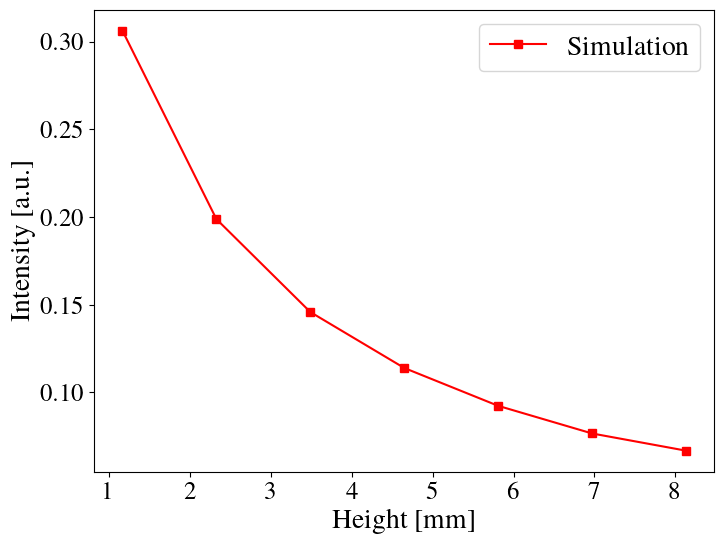

x: 1.16212942579522, y: 0.3061734035054906, dy/dx: -0.10384680769206528
x: 2.32425885159045, y: 0.19873959119932155, dy/dx: -0.06964334017739002
x: 3.48638827738567, y: 0.14574939654842547, dy/dx: -0.031709282405343236
x: 4.6485177031809, y: 0.11385331862708374, dy/dx: -0.022650731996988045
x: 5.81064712897612, y: 0.09226685776099558, dy/dx: -0.015751255517567276
x: 6.97277655477135, y: 0.07651330146226351, dy/dx: -0.010736307787477679
x: 8.13490598056657, y: 0.06670413089641943, dy/dx: -0.007292876385825613

Curve Type: Cubic Spline
Parameters: a_0: 0.0084, -0.0075, 0.0004, -0.0009, 0.0005, -0.0008, a_1: 0.0000, 0.0294, 0.0032, 0.0046, 0.0014, 0.0030, a_2: -0.1038, -0.0696, -0.0317, -0.0227, -0.0158, -0.0107, a_3: 0.3062, 0.1987, 0.1457, 0.1139, 0.0923, 0.0765


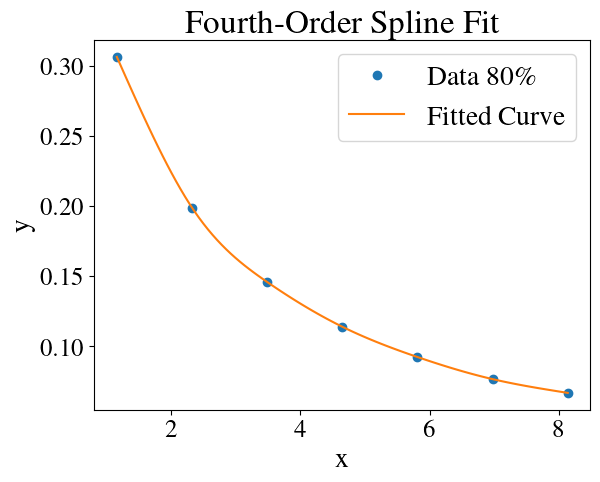

In [58]:
with open( directory + "/intensidad_ems_Ls_80.dat", "r") as f:
    lines = f.readlines()

# Create an empty list to store the data
t_intensity_L_80 = []

# Iterate over the lines in reverse order and extract the second value
for line in reversed(lines):
    value = float(line.split()[1])
    t_intensity_L_80.append(value)

# Print the final vector
#print(t_intensity_iso)
t_intensity_L_80 = np.array(t_intensity_L_80, dtype=float)

sum_t = sum(t_intensity_L_80)
t_intensity_L_80 = t_intensity_L_80/sum_t
print(t_intensity_L_80)


plt.figure(figsize=(8.00, 6.00))  # Set figure size in pixels

# Set LaTeX font
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times'

# Set font size
mpl.rcParams['font.size'] = 20

# Set axis tick font size
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18


# Plotting
plt.plot(c, t_intensity_L_80, 's-', label=r'Simulation', color='red')

# Axis labels and legend

plt.xlabel(r'{Height [mm]}')
plt.ylabel(r'Intensity [a.u.]')

plt.legend()

# Save and show figure
plt.show()

# Given data
x_data = np.array([1.16212942579522, 2.32425885159045, 3.48638827738567, 4.6485177031809, 5.81064712897612, 6.97277655477135, 8.13490598056657])
y_data = t_intensity_L_80

# Sort the data in increasing order of x
sort_indices = np.argsort(x_data)
x_data = x_data[sort_indices]
y_data = y_data[sort_indices]

# Create a cubic spline object
spline = CubicSpline(x_data, y_data, bc_type='natural')

# Calculate the derivatives at each data point
derivatives = spline.derivative()

# Generate x-values for the fitted curve
x_fit = np.linspace(x_data[0], x_data[-1], 100)

# Evaluate the spline at the fitted curve points
y_fit = spline(x_fit)

# Print the results
for x, y, dy in zip(x_data, y_data, derivatives(x_data)):
    print(f"x: {x}, y: {y}, dy/dx: {dy}")

# Get the equation of the cubic spline
coefs = spline.c.tolist()

# Print the curve type and parameters
curve_type = "Cubic Spline"
params = [f"a_{i}: " + ', '.join([f"{float(c):.4f}" for c in coef]) for i, coef in enumerate(coefs)]
params_str = ", ".join(params)
print(f"\nCurve Type: {curve_type}")
print(f"Parameters: {params_str}")

# Print the fitted curve data
#print("\nFitted Curve Data:")
#for x, y in zip(x_fit, y_fit):
#    print(f"x: {x}, y: {y}")

# Plot the data and fitted curve
plt.plot(x_data, y_data, 'o', label='Data 80\%')
plt.plot(x_fit, y_fit, label='Fitted Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fourth-Order Spline Fit')
plt.legend()

# Display the plot
plt.show()

[0.31534873 0.19939333 0.14434299 0.11195761 0.09046694 0.07506523
 0.06342517]


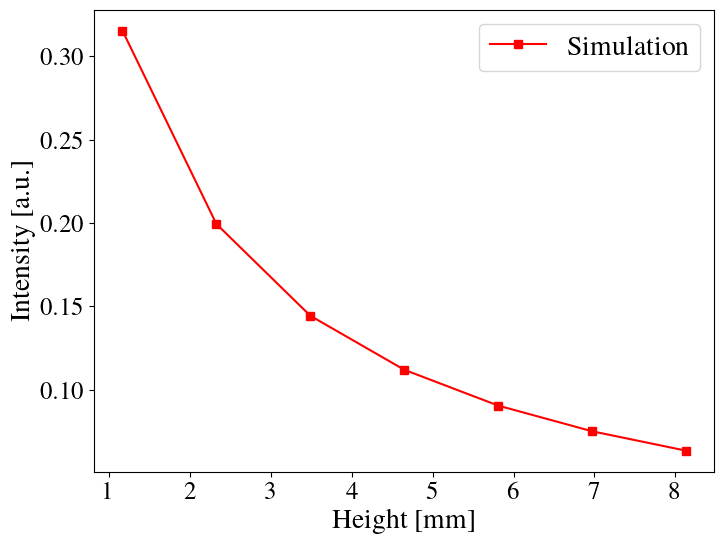

x: 1.16212942579522, y: 0.31534872620134036, dy/dx: -0.11257843450693471
x: 2.32425885159045, y: 0.19939333041960894, dy/dx: -0.07417828215240788
x: 3.48638827738567, y: 0.14434299155267277, dy/dx: -0.032154279798006606
x: 4.6485177031809, y: 0.11195760580287764, dy/dx: -0.022917129487234445
x: 5.81064712897612, y: 0.09046694279150914, dy/dx: -0.015256501594341417
x: 6.97277655477135, y: 0.07506522931951684, dy/dx: -0.011293355866385938
x: 8.13490598056657, y: 0.0634251739124742, dy/dx: -0.009377537720426177

Curve Type: Cubic Spline
Parameters: a_0: 0.0095, -0.0086, 0.0005, -0.0009, -0.0000, -0.0005, a_1: -0.0000, 0.0330, 0.0031, 0.0048, 0.0018, 0.0016, a_2: -0.1126, -0.0742, -0.0322, -0.0229, -0.0153, -0.0113, a_3: 0.3153, 0.1994, 0.1443, 0.1120, 0.0905, 0.0751


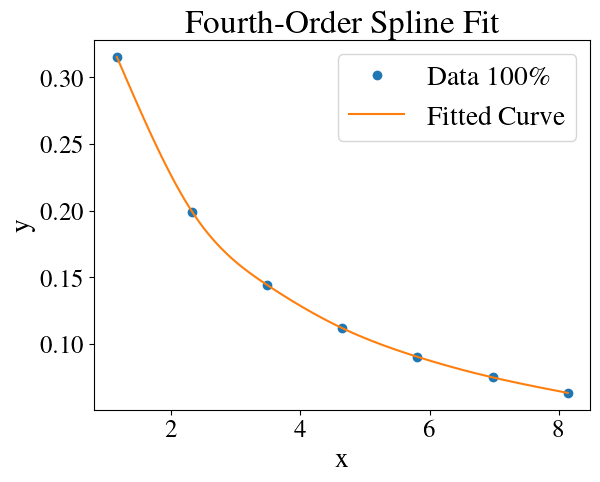

In [59]:
with open( directory + "/intensidad_ems_Ls_100.dat", "r") as f:
    lines = f.readlines()

# Create an empty list to store the data
t_intensity_L_100 = []

# Iterate over the lines in reverse order and extract the second value
for line in reversed(lines):
    value = float(line.split()[1])
    t_intensity_L_100.append(value)

# Print the final vector
#print(t_intensity_iso)
t_intensity_L_100 = np.array(t_intensity_L_100, dtype=float)

sum_t = sum(t_intensity_L_100)
t_intensity_L_100 = t_intensity_L_100/sum_t
print(t_intensity_L_100)


plt.figure(figsize=(8.00, 6.00))  # Set figure size in pixels

# Set LaTeX font
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times'

# Set font size
mpl.rcParams['font.size'] = 20

# Set axis tick font size
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18



# Plotting
plt.plot(c, t_intensity_L_100, 's-', label=r'Simulation', color='red')

# Axis labels and legend

plt.xlabel(r'{Height [mm]}')
plt.ylabel(r'Intensity [a.u.]')

plt.legend()

# Save and show figure
plt.show()

# Given data
x_data = np.array([1.16212942579522, 2.32425885159045, 3.48638827738567, 4.6485177031809, 5.81064712897612, 6.97277655477135, 8.13490598056657])
y_data = t_intensity_L_100

# Sort the data in increasing order of x
sort_indices = np.argsort(x_data)
x_data = x_data[sort_indices]
y_data = y_data[sort_indices]

# Create a cubic spline object
spline = CubicSpline(x_data, y_data, bc_type='natural')

# Calculate the derivatives at each data point
derivatives = spline.derivative()

# Generate x-values for the fitted curve
x_fit = np.linspace(x_data[0], x_data[-1], 100)

# Evaluate the spline at the fitted curve points
y_fit = spline(x_fit)

# Print the results
for x, y, dy in zip(x_data, y_data, derivatives(x_data)):
    print(f"x: {x}, y: {y}, dy/dx: {dy}")

# Get the equation of the cubic spline
coefs = spline.c.tolist()

# Print the curve type and parameters
curve_type = "Cubic Spline"
params = [f"a_{i}: " + ', '.join([f"{float(c):.4f}" for c in coef]) for i, coef in enumerate(coefs)]
params_str = ", ".join(params)
print(f"\nCurve Type: {curve_type}")
print(f"Parameters: {params_str}")

# Print the fitted curve data
#print("\nFitted Curve Data:")
#for x, y in zip(x_fit, y_fit):
#    print(f"x: {x}, y: {y}")

# Plot the data and fitted curve
plt.plot(x_data, y_data, 'o', label='Data 100\%')
plt.plot(x_fit, y_fit, label='Fitted Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fourth-Order Spline Fit')
plt.legend()

# Display the plot
plt.show()

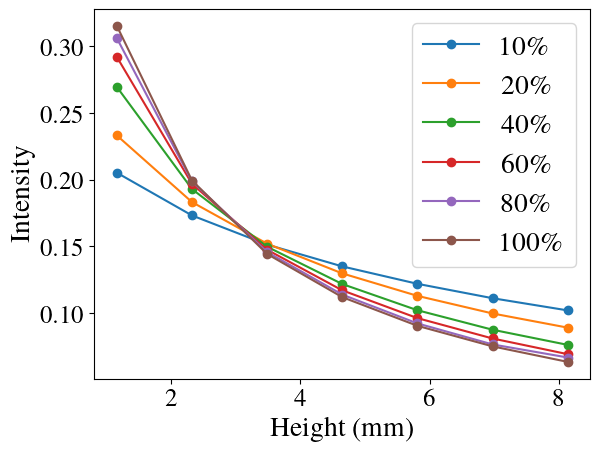

In [60]:
plt.plot(c, t_intensity_L_10, 'o-', label='10\%')
plt.plot(c, t_intensity_L_20, 'o-', label='20\%')
plt.plot(c, t_intensity_L_40, 'o-', label='40\%')
plt.plot(c, t_intensity_L_60, 'o-', label='60\%')
plt.plot(c, t_intensity_L_80, 'o-', label='80\%')
plt.plot(c, t_intensity_L_100, 'o-', label='100\%')
plt.xlabel('Height (mm)')
plt.ylabel('Intensity')
plt.legend()
plt.show()